# 1. Import Library

In [1]:
# ===============================
# IMPORT LIBRARY
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# 2. Load Dataset

In [2]:
# Upload file Campus Recruitment.csv terlebih dahulu

df = pd.read_csv('Campus Recruitment.csv')
df.head()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


# 3. Menelaah & Menvalidasi Data

In [3]:
print("Jumlah Data:", df.shape)
print("\nTipe Data:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

Jumlah Data: (215, 15)

Tipe Data:
ID                                    int64
Jenis Kelamin                        object
Nilai rata-rata SMP                 float64
Lembaga pendidikan kelas 10          object
Nilai rata-rata SMA                 float64
Lembaga pendidikan kelas 12          object
Jurusan saat SMA                     object
IPK                                 float64
Program studi sarjana                object
Pengalaman kerja sebelum lulus       object
Nilai tes kemampuan kerja           float64
Pendidikan pascasarjana              object
Nilai rata-rata pascasarjana        float64
status kelulusan (Bekerja/Belum)     object
Gaji                                float64
dtype: object

Missing Values:
ID                                   0
Jenis Kelamin                        1
Nilai rata-rata SMP                  2
Lembaga pendidikan kelas 10          0
Nilai rata-rata SMA                  1
Lembaga pendidikan kelas 12          0
Jurusan saat SMA                     0
I

In [5]:
df = df.drop(columns=['Gaji'])

# 4. Membersihkan & Encoding Data

In [7]:
# Drop kolom ID
df = df.drop(columns=['ID'])

# Encoding variabel kategorikal
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum)
0,2,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,2,79.33,1,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,2,65.00,1,68.00,2,0,64.00,0,0,75.0,0,57.80,1
3,2,56.00,1,52.00,2,2,52.00,2,0,66.0,1,59.43,0
4,2,85.80,1,73.60,1,1,73.30,0,0,96.8,0,55.50,1


# 5. Menentukan Feature & Target

In [11]:
X = df.drop('status kelulusan (Bekerja/Belum)', axis=1)
y = df['status kelulusan (Bekerja/Belum)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Normalisasi (untuk Logistic Regression)

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL 1 — LOGISTIC REGRESSION
# 7. Training Model

In [15]:
# Impute NaNs in scaled data before training
# This step ideally should be done earlier in the preprocessing pipeline,
# but is performed here to address the error within the selected cell's scope.
for i in range(X_train_scaled.shape[1]):
    col_mean_train = np.nanmean(X_train_scaled[:, i])
    X_train_scaled[:, i][np.isnan(X_train_scaled[:, i])] = col_mean_train

for i in range(X_test_scaled.shape[1]):
    col_mean_test = np.nanmean(X_test_scaled[:, i])
    X_test_scaled[:, i][np.isnan(X_test_scaled[:, i])] = col_mean_test

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

# 8. Evaluasi Model

Accuracy Logistic Regression: 0.8604651162790697

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



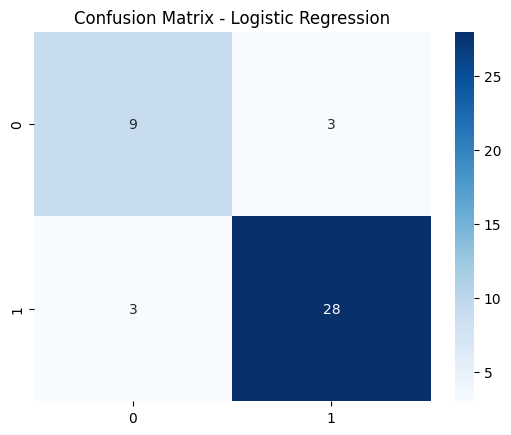

In [16]:
y_pred_log = log_model.predict(X_test_scaled)

print("Accuracy Logistic Regression:",
      accuracy_score(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 9. Melihat Pengaruh Variabel (Koefisien)

In [17]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
1,Nilai rata-rata SMP,2.171597
6,IPK,1.362846
3,Nilai rata-rata SMA,0.786819
8,Pengalaman kerja sebelum lulus,0.779702
0,Jenis Kelamin,0.400732
2,Lembaga pendidikan kelas 10,-0.062479
5,Jurusan saat SMA,-0.177080
10,Pendidikan pascasarjana,-0.321005
9,Nilai tes kemampuan kerja,-0.413026
7,Program studi sarjana,-0.420398


# Feature Importance – Logistic Regression

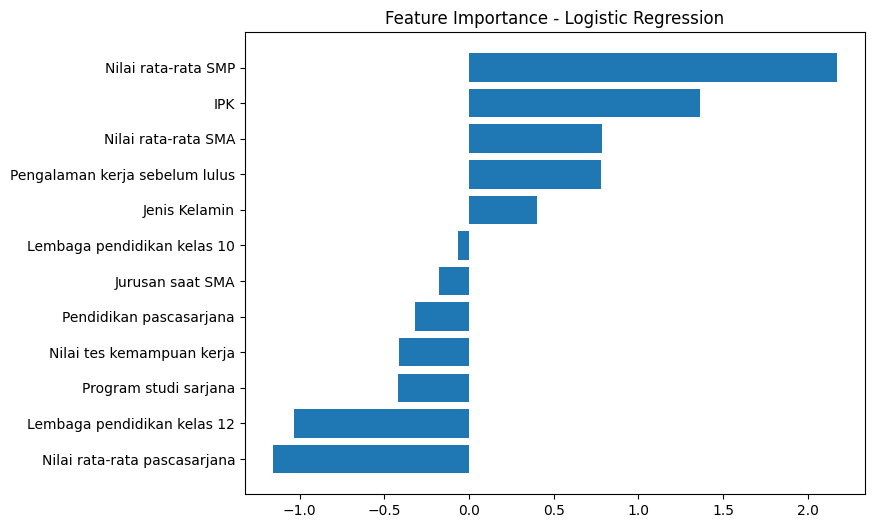

In [24]:
# ===============================
# FEATURE IMPORTANCE - LOGISTIC REGRESSION
# ===============================

feature_importance_log = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_model.coef_[0]
})

# Urutkan dari paling berpengaruh
feature_importance_log = feature_importance_log.sort_values(
    by='Importance', ascending=False)

feature_importance_log

plt.figure(figsize=(8,6))
plt.barh(feature_importance_log['Feature'],
         feature_importance_log['Importance'])
plt.title("Feature Importance - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


# MODEL 2 — DECISION TREE
# 10. Training Model

In [18]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

# 11. Evaluasi Model

Accuracy Decision Tree: 0.7906976744186046

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43



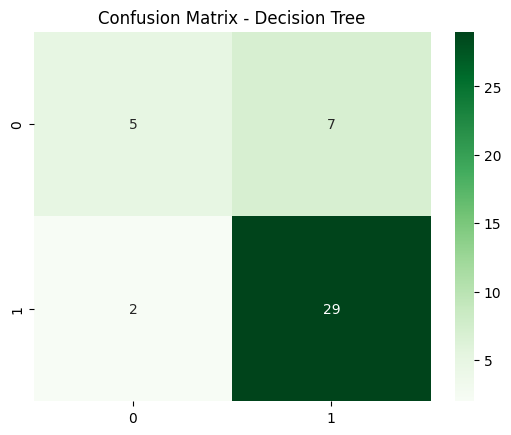

In [19]:
y_pred_tree = tree_model.predict(X_test)

print("Accuracy Decision Tree:",
      accuracy_score(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

sns.heatmap(confusion_matrix(y_test, y_pred_tree),
            annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Feature Importance – Decision Tree

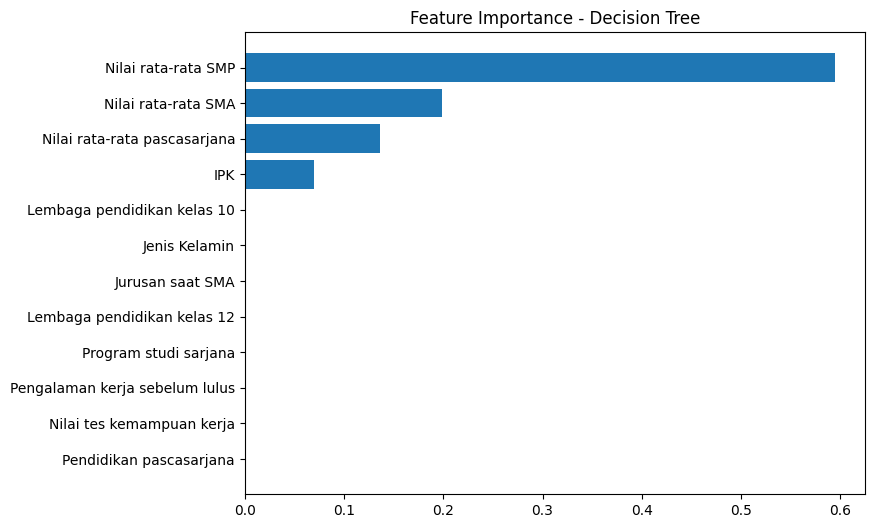

In [25]:
# ===============================
# FEATURE IMPORTANCE - DECISION TREE
# ===============================

feature_importance_tree = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
})

feature_importance_tree = feature_importance_tree.sort_values(
    by='Importance', ascending=False)

feature_importance_tree

plt.figure(figsize=(8,6))
plt.barh(feature_importance_tree['Feature'],
         feature_importance_tree['Importance'])
plt.title("Feature Importance - Decision Tree")
plt.gca().invert_yaxis()
plt.show()


# Analisis Fokus Soal
# Pengaruh Nilai Akademik terhadap Placement

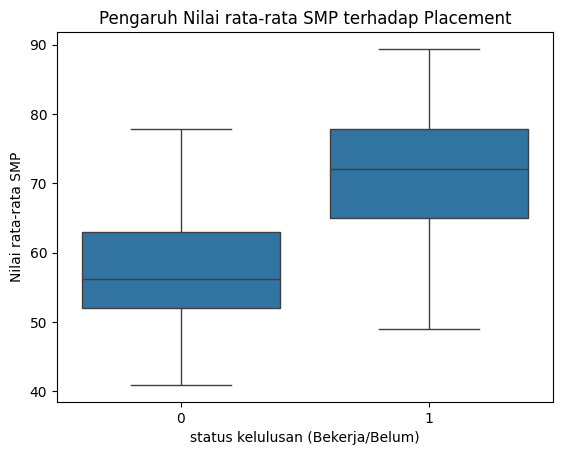

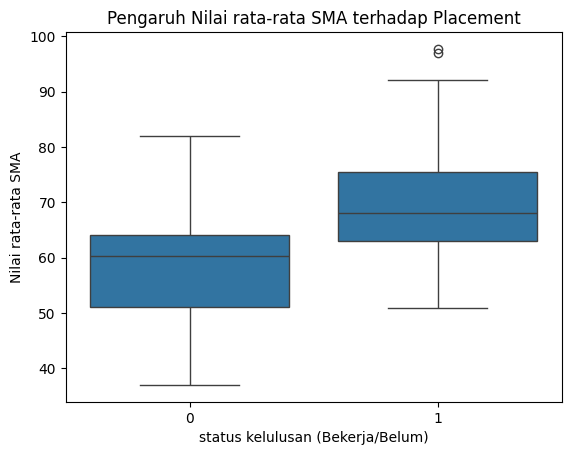

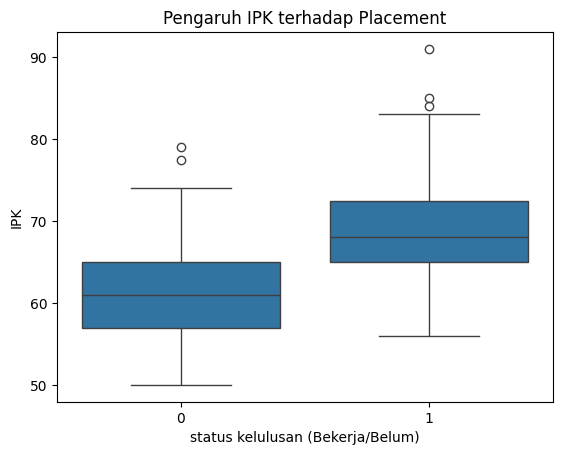

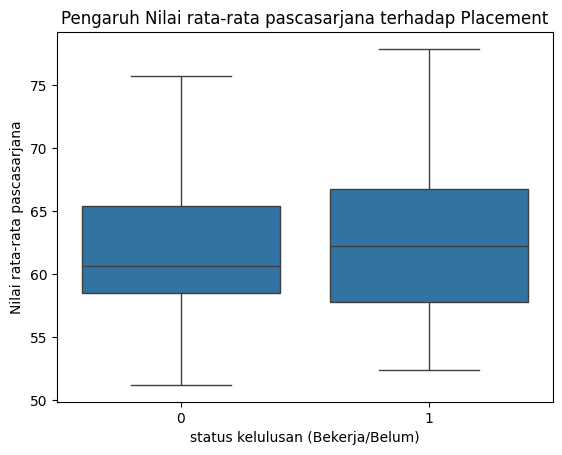

In [21]:
academic_cols = ['Nilai rata-rata SMP', 'Nilai rata-rata SMA', 'IPK', 'Nilai rata-rata pascasarjana']

for col in academic_cols:
    sns.boxplot(x=df['status kelulusan (Bekerja/Belum)'], y=df[col])
    plt.title(f'Pengaruh {col} terhadap Placement')
    plt.show()

# Peran Employability & Work Experience

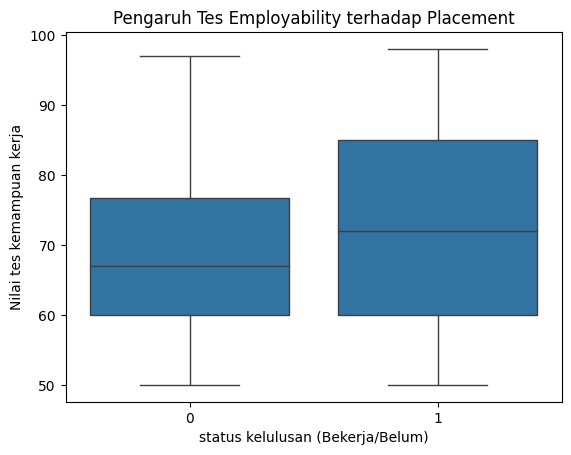

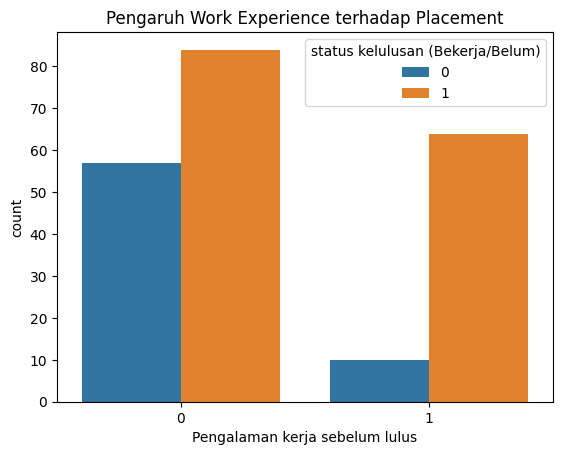

In [23]:
sns.boxplot(x=df['status kelulusan (Bekerja/Belum)'], y=df['Nilai tes kemampuan kerja'])
plt.title("Pengaruh Tes Employability terhadap Placement")
plt.show()

sns.countplot(x='Pengalaman kerja sebelum lulus', hue='status kelulusan (Bekerja/Belum)', data=df)
plt.title("Pengaruh Work Experience terhadap Placement")
plt.show()